In [1]:
import pandas as pd
import os
import glob
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [2]:
# constants
RUN_SUMMARY_LOC = '../run_summaries/runtime_analysis'

In [3]:
all_results = pd.DataFrame()
for file_ in glob.glob(os.path.join(RUN_SUMMARY_LOC, '*.csv')):
    temp = pd.read_csv(file_)
    all_results = all_results.append(temp)

In [4]:
all_results = all_results.sort_values(['run_name', 
                                       'iteration', 
                                       'timestamp', 
                                       'accuracy_test', 
                                       'accuracy_val', 
                                       'accuracy_train'])

In [5]:
all_results = all_results.groupby(['run_name'])['timestamp'].agg({max, min}).reset_index()
all_results['time_delta'] = all_results.apply(lambda x: x['max'] - x['min'], axis=1)
all_results['run_number'] = all_results.apply(lambda x: (x['run_name'].split('_')[0].split('=')[1]), axis=1)
all_results['num_workers'] = all_results.apply(lambda x: (x['run_name'].split('_')[5].split('=')[1]), axis=1)

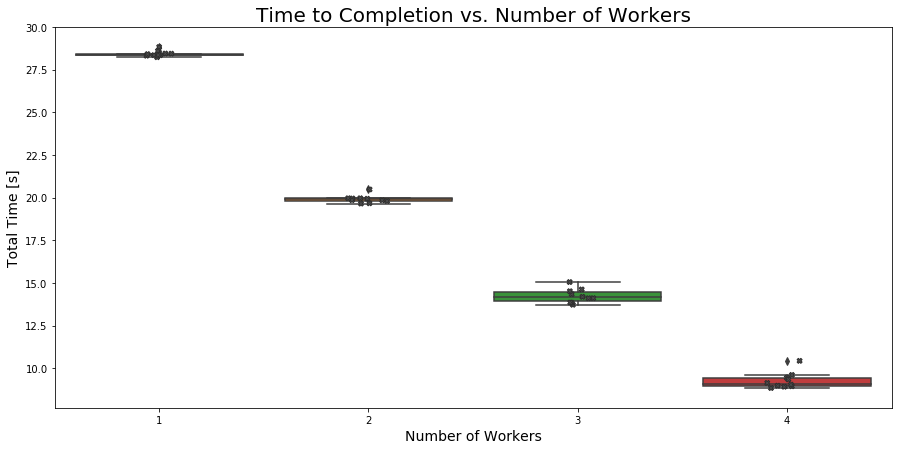

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='num_workers', y='time_delta' ,data=all_results)
sns.stripplot(x='num_workers', y='time_delta', data=all_results, jitter=True, marker='X', linewidth=1, color=".3")
plt.ylabel('Total Time [s]', fontsize=14)
plt.title('Time to Completion vs. Number of Workers', fontsize=20)
plt.xlabel('Number of Workers', fontsize=14)
plt.show()

In [16]:
pretty_results = all_results.groupby(['num_workers'])['time_delta'].mean().reset_index()
pretty_results['time_delta'] = pretty_results.apply(lambda x: round(x['time_delta'], 2), axis=1)
pretty_results.columns = ['num_workers', 'average time']
pretty_results

,num_workers,average time
0,1,28.43
1,2,19.91
2,3,14.23
3,4,9.27
